# PROJECT OF WEATHER

## General about dataset

In [137]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [138]:
df = pd.read_csv('/Users/hoanh/Desktop/Data Source/weather.csv')

In [139]:
### sort data acording to date & province
df.sort_values(['date','province'])

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
13623,Ben Tre,28,22,9,SE,7.3,91,75,1010,2009-01-01
27334,Bien Hoa,29,22,6,SE,18.5,89,68,1010,2009-01-01
40969,Buon Me Thuot,20,19,11,ENE,13.9,97,96,1013,2009-01-01
54874,Ca Mau,26,23,21,NNE,3.4,90,85,1010,2009-01-01
...,...,...,...,...,...,...,...,...,...,...
106809,Viet Tri,37,28,8,SSE,0.0,65,19,1002,2021-06-18
120444,Vinh,35,27,13,SW,0.0,66,9,1004,2021-06-18
134177,Vinh Long,33,25,11,WSW,0.3,78,52,1010,2021-06-18
147710,Vung Tau,30,27,16,WSW,5.9,78,67,1010,2021-06-18


In [140]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000
mean,29.837277,23.277874,11.038657,6.567130,77.083068,41.721268,1010.229127
std,4.571345,3.945381,5.311807,13.602055,9.288553,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


In [141]:
### Give information about type of each variables and the number of observations
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  181960 non-null  object 
 1   max       181960 non-null  int64  
 2   min       181960 non-null  int64  
 3   wind      181960 non-null  int64  
 4   wind_d    181960 non-null  object 
 5   rain      181960 non-null  float64
 6   humidi    181960 non-null  int64  
 7   cloud     181960 non-null  int64  
 8   pressure  181960 non-null  int64  
 9   date      181960 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 13.9+ MB
None


In [142]:
### basic statistical indicator of dataset
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000
mean,29.837277,23.277874,11.038657,6.567130,77.083068,41.721268,1010.229127
std,4.571345,3.945381,5.311807,13.602055,9.288553,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


## Temperature analyst

In [143]:
### Find the number of provinces which occurs in this data set
len(np.unique(df['province']))

40

In [144]:
df['date_time'] = pd.to_datetime(df['date'])
df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,date_time
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...
181955,Soc Trang,28,23,8,SSW,0.0,75,50,1011,2016-12-28,2016-12-28
181956,Soc Trang,30,24,21,ENE,7.2,81,50,1011,2017-12-28,2017-12-28
181957,Soc Trang,26,24,9,ENE,1.3,91,75,1009,2018-12-28,2018-12-28
181958,Soc Trang,30,23,11,E,0.0,74,6,1012,2019-12-28,2019-12-28


In [145]:
### I want to know what province has the highest/lowest temperature in term of max temperature and the time of this event
temp_max, pro_max = 0,0
temp_min, pro_min = 100,0 
for i in np.unique(df['province']):
    temp1 = np.max(df.loc[df['province']==i, 'max'])
    temp2 = np.min(df.loc[df['province']==i, 'max'])
    if temp1 > temp_max:
        temp_max,pro_max = temp1,i
    if temp2 < temp_min:
        temp_min, pro_min = temp2,i 
yrs_max = df.loc[(df['province']==pro_max)&(df['max']==temp_max),'date']
print()
print('The highest temperature in term of max temperature of',pro_max,'is',temp_max,'in',yrs_max.values[0])
print()
yrs_min = df.loc[(df['province']==pro_min)&(df['max']==temp_min),'date']
print('The lowest temperature in term of max temperature of',pro_max,'is',temp_min,'in',yrs_min.values[0])


The highest temperature in term of max temperature of Hoa Binh is 46 in 2012-05-03

The lowest temperature in term of max temperature of Hoa Binh is 4 in 2016-01-26


### Analyse temperature of Hoa Binh in May 2012 

In [146]:
### Max and min temparature of the province which had highest record of temparature in term of max tempareture in month when this event occured
yrs_max_int = int(pd.to_datetime(yrs_max).dt.year)
month_max_int = int(pd.to_datetime(yrs_max).dt.month)
hoabinh_temp_may_2012 = df.loc[(df['province']=='Hoa Binh') & (df['date_time'].dt.month==month_max_int) & (df['date_time'].dt.year==yrs_max_int),('date_time','max','min')]
hoabinh_temp_may_2012 = hoabinh_temp_may_2012.sort_values('date_time')

In [147]:
a = y_axis1 = np.array(hoabinh_temp_may_2012['max'])
b = y_axis2 = np.array(hoabinh_temp_may_2012['min'])
hoabinh_temp_may_2012['diff'] = a - b 
max_diff = np.max(hoabinh_temp_may_2012 ['diff'])
hoabinh_temp_may_2012.loc[hoabinh_temp_may_2012['diff']==max_diff]

,date_time,max,min,diff
19733,2012-05-02,45,26,19
19785,2012-05-03,46,27,19


In [148]:
hoabinh_temp_may_2012['day'] = hoabinh_temp_may_2012['date_time'].dt.day

Text(0.5, 1.1, 'Daily temperatute of Hoa Binh province in May 2012')

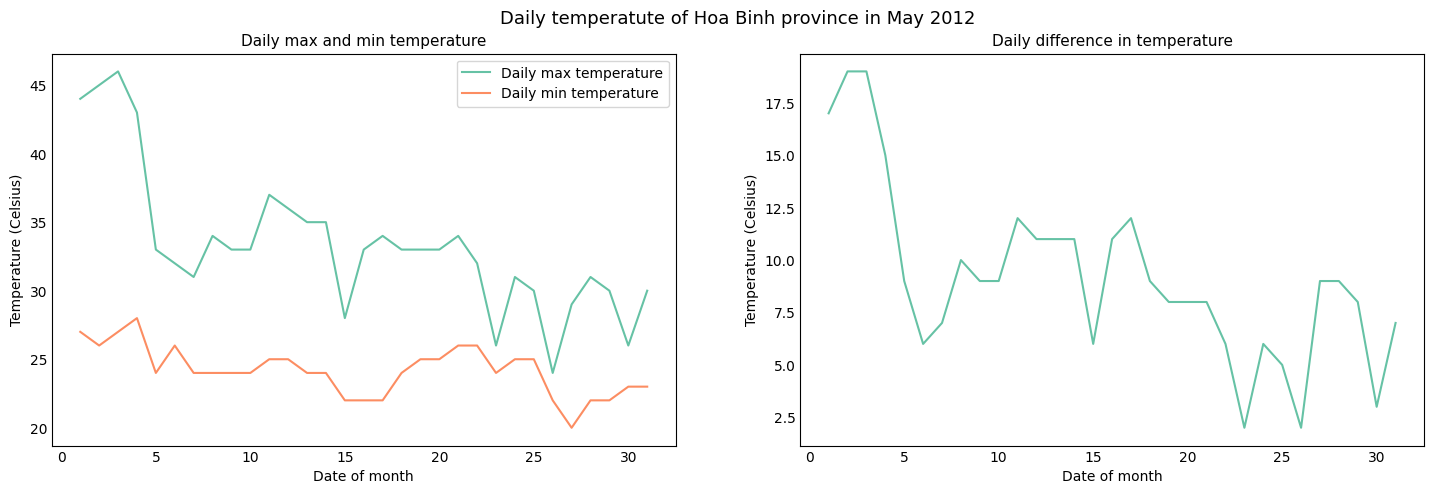

In [149]:
### draw graph 'Temperature of Hoa Binh province in May 2016'
plt.style.use('_mpl-gallery-nogrid')
sns.set_palette('Set2')
fig, axes = plt.subplots(1,2, figsize=(14,4))  

### Max and Min temperature of Hoa Binh province in May 2012
sns.lineplot(ax=axes[0], data=hoabinh_temp_may_2012, y='max', x='day', label = 'Daily max temperature')
sns.lineplot(ax=axes[0], data=hoabinh_temp_may_2012, y='min', x='day', label='Daily min temperature')
axes[0].set_xlabel('Date of month', fontsize= 10)
axes[0].set_ylabel('Temperature (Celsius)', fontsize= 10)
axes[0].set_title('Daily max and min temperature', fontsize= 11)
axes[0].legend(loc='upper right')

### Difference between max and min temperature of Hoa Binh province in May 2012
sns.lineplot(ax=axes[1], data=hoabinh_temp_may_2012, y='diff', x='day')
axes[1].set_xlabel('Date of month', fontsize= 10)
axes[1].set_ylabel('Temperature (Celsius)', fontsize= 10)
axes[1].set_title('Daily difference in temperature', fontsize= 11)

fig.suptitle('Daily temperatute of Hoa Binh province in May 2012', fontsize= 13 ,y=1.1)

### Analyse temperature of Hoa Binh in January 2016

In [150]:
### Max and min temparature of the province which had highest record of temparature in term of max tempareture in month when this event occured
yrs_min_int = int(pd.to_datetime(yrs_min).dt.year)
month_min_int = int(pd.to_datetime(yrs_min).dt.month)
hoabinh_temp_jan_2016 = df.loc[(df['province']=='Hoa Binh') & (df['date_time'].dt.month==month_min_int) & (df['date_time'].dt.year==yrs_min_int),('date_time','max','min')]
hoabinh_temp_jan_2016 = hoabinh_temp_jan_2016.sort_values('date_time')

In [151]:
c = y_axis1 = np.array(hoabinh_temp_jan_2016['max'])
d = y_axis2 = np.array(hoabinh_temp_jan_2016['min'])
hoabinh_temp_jan_2016['diff'] = c - d 
max_diff = np.max(hoabinh_temp_jan_2016['diff'])
hoabinh_temp_jan_2016.loc[hoabinh_temp_jan_2016['diff']==max_diff]

,date_time,max,min,diff
18205,2016-01-05,30,15,15


In [152]:
hoabinh_temp_jan_2016['day'] = hoabinh_temp_jan_2016['date_time'].dt.day

Text(0.5, 1.0, 'Daily difference in temperature')

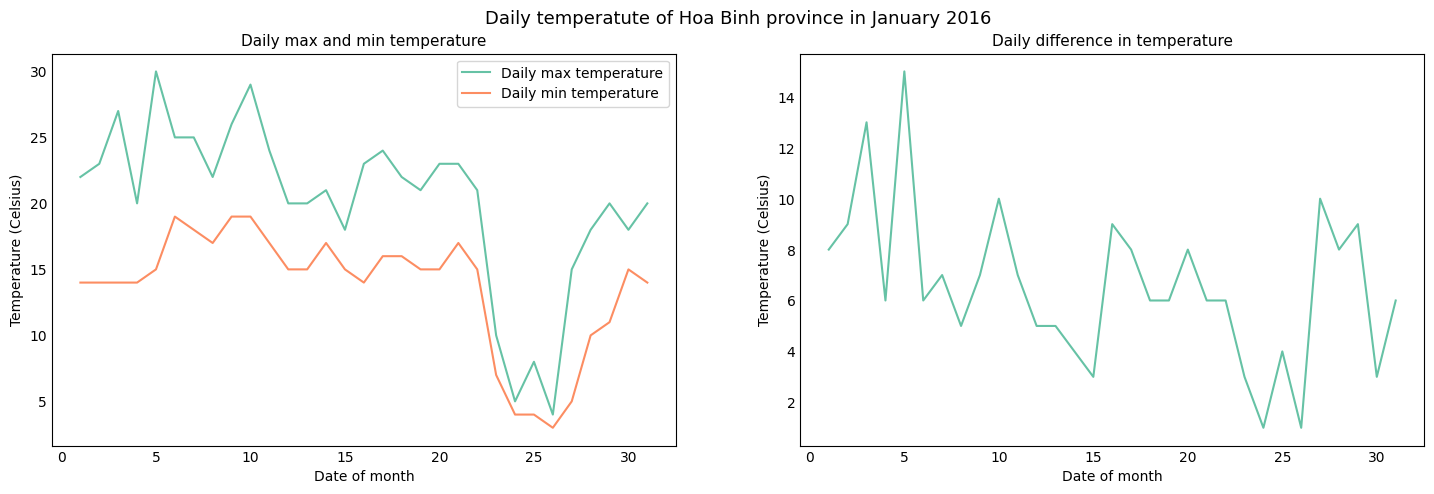

In [153]:
### draw graph 'Temperature of Hoa Binh province in January 2016'
plt.style.use('_mpl-gallery-nogrid')
sns.set_palette('Set2')
fig, axes = plt.subplots(1,2, figsize=(14,4))    
fig.suptitle('Daily temperatute of Hoa Binh province in January 2016', fontsize= 13 ,y=1.1)

### Max and Min temperature of Hoa Binh province in January 2016
sns.lineplot(ax=axes[0], data=hoabinh_temp_jan_2016, y='max', x='day', label = 'Daily max temperature')
sns.lineplot(ax=axes[0], data=hoabinh_temp_jan_2016, y='min', x='day', label='Daily min temperature')
axes[0].set_xlabel('Date of month', fontsize= 10)
axes[0].set_ylabel('Temperature (Celsius)', fontsize= 10)
axes[0].set_title('Daily max and min temperature', fontsize= 11)
axes[0].legend(loc='upper right')

### Difference between max and min temperature of Hoa Binh province in January 2016
sns.lineplot(ax=axes[1], data=hoabinh_temp_jan_2016, y='diff', x='day')
axes[1].set_xlabel('Date of month', fontsize= 10)
axes[1].set_ylabel('Temperature (Celsius)', fontsize= 10)
axes[1].set_title('Daily difference in temperature', fontsize= 11)


## Wind speed analyst

### Average wind speed

In [154]:
### Determine the level of wind speed for each observation
def determine_level(mylist):
    level = []
    for i in mylist:
        if i < 2: level.append(0)
        if 2 <= i <= 5: level.append(1)
        if 6 <= i <= 11: level.append(2)
        if 12 <= i <= 19: level.append(3)
        if 20 <= i <= 28: level.append(4)
        if 29 <= i <= 38: level.append(5)
        if 39 <= i <= 49: level.append(6)
        if 50 <= i <= 61: level.append(7)
        if 62 <= i <= 74: level.append(8)
        if 75 <= i <= 88: level.append(9)
        if 89 <= i <= 102: level.append(10)
        if 103 <= i <= 117: level.append(11)
        if 118 <= i: level.append(2)
    return np.array(level)

wind_table = df[['province','wind','date_time']].sort_values('date_time')
wind_table['level'] = determine_level(wind_table['wind'])

### Create a column contain year
wind_table['year'] = wind_table['date_time'].dt.year

In [155]:
### Create table contains the average wind speed of all province yearly (km/h)
### avg_wind_table
avg_wind_table = pd.DataFrame(wind_table.groupby(['province','year'], as_index=False)['wind'].mean()).round(2)
avg_wind_table = avg_wind_table.rename(columns={'wind':'Avg speed of wind'})


### Find the max and min average of wind speed of province in year?
min_avg_wind_speed = np.min(avg_wind_table['Avg speed of wind'])
max_avg_wind_speed = np.max(avg_wind_table['Avg speed of wind'])

max_wind_pro = avg_wind_table.loc[avg_wind_table['Avg speed of wind']==max_avg_wind_speed,('province', 'year', 'Avg speed of wind')]
print()
print('The highest average wind speed from 2009 to 2021 of 40 provinces belongs to', max_wind_pro.values[0][0], 'in', max_wind_pro.values[0][1], ',with', max_wind_pro.values[0][2] ,'km/h')

min_wind_pro = avg_wind_table.loc[avg_wind_table['Avg speed of wind']==min_avg_wind_speed]
print()
print('The lowest average wind speed from 2009 to 2021 of 40 provinces belongs to', min_wind_pro.values[0][0], 'in', min_wind_pro.values[0][1], ',with', min_wind_pro.values[0][2] ,'km/h')



The highest average wind speed from 2009 to 2021 of 40 provinces belongs to Vung Tau in 2019 ,with 21.92 km/h

The lowest average wind speed from 2009 to 2021 of 40 provinces belongs to Da Lat in 2020 ,with 4.54 km/h


### Tropical depression

In [156]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [303]:
### create table which contains provinces have tropical depression (daily)
trop_depres_tb = wind_table[['province','date_time','level']].loc[(wind_table['level']==6) | (wind_table['level']==7)]
trop_depres_tb['level'].value_counts()
### date_time according year and month
trop_depres_tb['year']  = trop_depres_tb['date_time'].dt.year
trop_depres_tb['month']  = trop_depres_tb['date_time'].dt.month

### frquencies of tropical depression group by province and year-month
trop_depres_tb = trop_depres_tb.groupby(['province', 'year','month'], as_index=False)['level'].count().rename(columns={'level':'freq'})

Text(0.5, 0, 'Province')

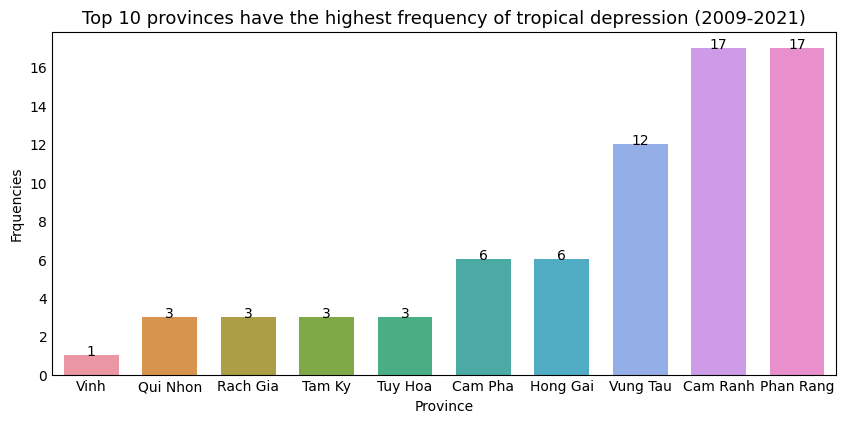

In [304]:
### the number of tropical depression occours from 2009 to 2020 (case in: 40 province in Vietnam)
frq_trop_dpr = pd.DataFrame(trop_depres_tb.groupby('province')['freq'].sum())
frq_trop_dpr = frq_trop_dpr.reset_index()

### create bar chart which illustrates top 5 province have largest the frequency of tropical depression 
frq_trop_dpr_top_10 = frq_trop_dpr.sort_values('freq')[-10:] ### extract top 10 provinces having the highest frequencies of tropical depression
frq_trop_dpr_top_10 = frq_trop_dpr_top_10.sort_values('freq')

### 
x = list(frq_trop_dpr_top_10['province'])
y = list(frq_trop_dpr_top_10['freq'])

### Graph illustrates top 10 provinces have the highest frequency of tropical depression
fig = plt.subplots(figsize=(8,3.5))
sns.barplot(x=frq_trop_dpr_top_10['province'], y=frq_trop_dpr_top_10['freq'], width=0.7)
plt.style.use('_mpl-gallery-nogrid')

### Adding labels for each column
addlabels(x,y)

plt.title('Top 10 provinces have the highest frequency of tropical depression (2009-2021)',fontsize=13)
plt.ylabel('Frquencies', fontsize=10)
plt.xlabel('Province',fontsize=10)

In [300]:
frq_trop_dpr_top_5 = frq_trop_dpr.sort_values('freq')[-5:]

top_5_pro_name = np.unique(frq_trop_dpr_top_5['province'])

trop_depres_tb_1 = trop_depres_tb[['province','year','month','freq']]

### Create year_month columns
year_month = []
for i in range(len(trop_depres_tb_1['month'])):
    year_month.append(str(trop_depres_tb_1['year'][i]) +'-'+ str(trop_depres_tb_1['month'][i]))
trop_depres_tb_1['year_month'] = year_month

trop_depres_tb_1['year_month'] = pd.to_datetime(trop_depres_tb_1['year_month'])

### 
trop_depres_tb_1 = trop_depres_tb_1.groupby(['province','year_month'], as_index=False)['freq'].sum()

### Create dataframe to obtain 
top_5_pro_tropi = pd.DataFrame(columns=['province','year_month','freq'])

## Top 5 province have most frequency of tropical depression 
for i in top_5_pro_name:
    t = trop_depres_tb_1.loc[trop_depres_tb_1['province']==i]
    top_5_pro_tropi = pd.concat((top_5_pro_tropi,t))


### Wind direction

In [ ]:
wind_d_table = df[['province', 'date_time', 'wind','wind_d']]
wind_d_table_1 =  pd.DataFrame(wind_d_table['wind_d'].value_counts()).reset_index()
wind_d_table_1 = wind_d_table_1.rename(columns={'index':'wind_d','wind_d':'frequency'})
wind_d_table_1['proportion'] = (wind_d_table_1['frequency']/df.shape[0]*100).round(2)
wind_d_table_1

,wind_d,frequency,proportion
0,ESE,21526,11.83
1,SE,21205,11.65
2,E,19773,10.87
3,WSW,18310,10.06
4,ENE,16527,9.08
5,SW,16444,9.04
6,SSE,16305,8.96
7,S,13927,7.65
8,SSW,13267,7.29
9,W,7472,4.11


Text(0.5, 1.0, 'Proportion of occurrence of wind direction')

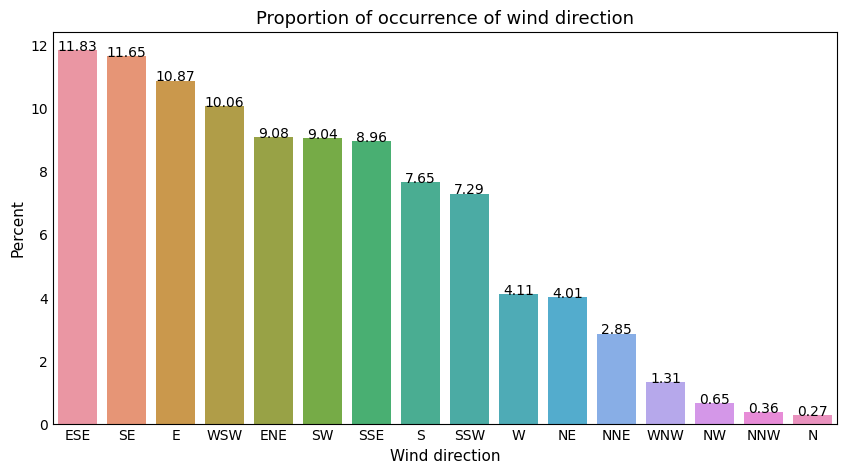

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=wind_d_table_1, x='wind_d', y='proportion')
pro_wind_d = np.array(wind_d_table_1['proportion'])
addlabels(wind_d_table_1['wind_d'],pro_wind_d)
plt.ylabel('Percent',fontsize=11)
plt.xlabel('Wind direction', fontsize=11)
plt.title('Proportion of occurrence of wind direction', fontsize=13)

### Amount of rain(mm), Humidity(%) and Cloud

In [ ]:
### create table cointains province, date_time, rain and humidi
table3 = df[['province','rain','humidi','cloud', 'date_time']]

### Create columns avarage temperature - arithmetic mean of max and min temperature of date)
max_temp = np.array(df['max'])
min_temp = np.array(df['min'])
table3['avg_temp'] = (max_temp + min_temp)/2

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_18620/1887950919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table3['avg_temp'] = (max_temp + min_temp)/2


#### Relationship between rain (per month) and humid (per month) (2009-2021)

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_18620/3984948866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_tb['month'] = rain_tb['date_time'].dt.month


Text(0, 0.5, 'Amount of rain (mm)')

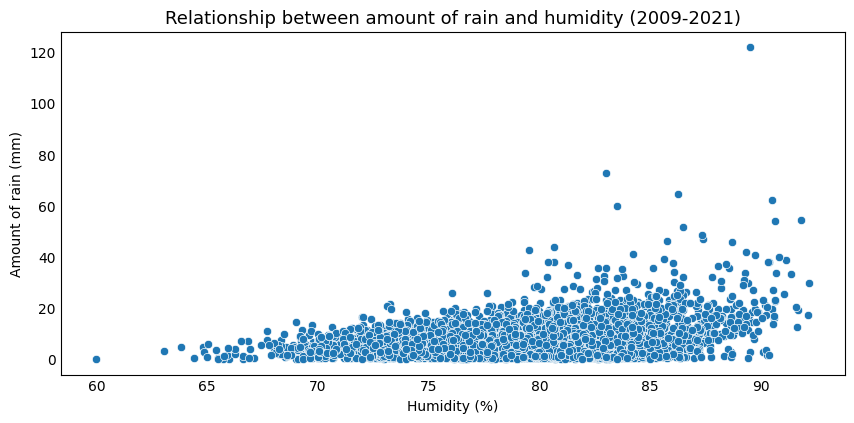

In [ ]:
### query to find days which rained
rain_tb = table3.loc[table3['rain'] != 0]
rain_tb['month'] = rain_tb['date_time'].dt.month

### The average humidity of 40 provinces from 2009 to 2021 (per month)
humidi_per_month = rain_tb[['province','date_time','humidi']].groupby(['date_time'], as_index=False)['humidi'].mean()

### The average amount of rain of 40 provinces from 2009 to 2021 (per month)
rain_per_month = rain_tb[['province','date_time','rain']].groupby(['date_time'], as_index=False)['rain'].mean()

### Merge humidi per month with rain per month 
rain_humidi = rain_per_month.merge(humidi_per_month, on =['date_time']) 
rain_humidi

### Graph illustrates relationship between amount of rain per month and himidi per month (2009-2021)
fig1 = plt.subplots(figsize=(8,3.5))
sns.scatterplot(data=rain_humidi, x='humidi', y='rain')
plt.style.use('_mpl-gallery-nogrid')
plt.title('Relationship between amount of rain and humidity (2009-2021)', fontsize= 13)
plt.xlabel('Humidity (%)', fontsize=10)
plt.ylabel('Amount of rain (mm)', fontsize= 10)

#### Heavy rain form 2009 to 2021. (Heavy rain has amount of rain > 25 mm)

In [ ]:
### create table hvy_rain_table contains only heavy rain
hvy_rain_table = rain_tb.query('rain>=50')

### Count the occurences of heavy rain from 2009 to 2021 (12 month of year)
hvy_rain_freq = hvy_rain_table[['month','rain']].groupby('month', as_index=False)['rain'].count()

### Average humidity from 2009 to 2021 (12 month of year)
cloud_mean = hvy_rain_table[['month', 'cloud']].groupby('month', as_index=False)['cloud'].mean()

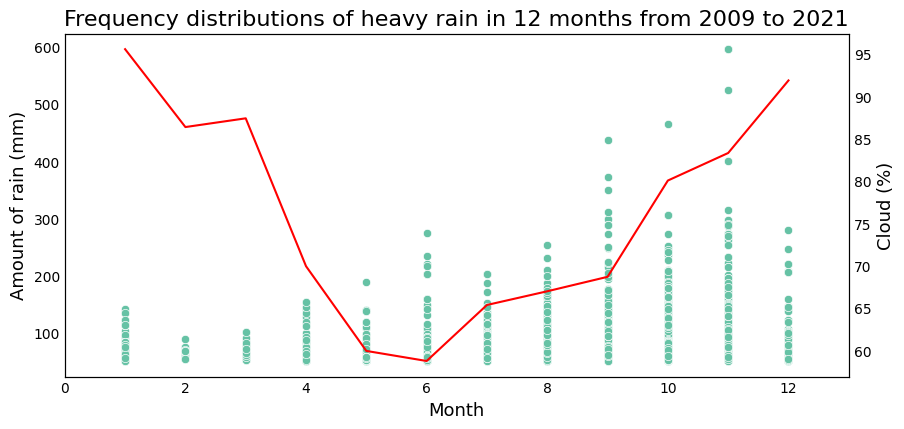

In [ ]:
### Graph illustrates the frequencies of heavy rain in 12 month from 2009 to 2021
plt.style.use('_mpl-gallery-nogrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(8,3.5))

plt.title('Frequency distributions of heavy rain in 12 months from 2009 to 2021', fontsize= 16)
ax = sns.scatterplot(data=hvy_rain_table, x='month', y='rain')

plt.ylabel('Amount of rain (mm)',fontsize= 13)
plt.xlabel('Month',fontsize= 13)

ax.twinx()
ax = sns.lineplot(data=cloud_mean, x='month', y='cloud', color='r')
plt.ylabel('Cloud (%)',fontsize= 13)
plt.xlim(0,13)

# sns.set_palette('bright')
plt.show()

In [ ]:
### Create table which contains top 10 provinces which have the highest frequency of rain from 2009 to 2021
hvy_rain_rating =  hvy_rain_table.groupby('province', as_index=False)['rain'].count().sort_values('rain', ascending=False)[:10]

### Create labels for each columns
x = list(hvy_rain_rating['province'])
y = list(hvy_rain_rating['rain'])

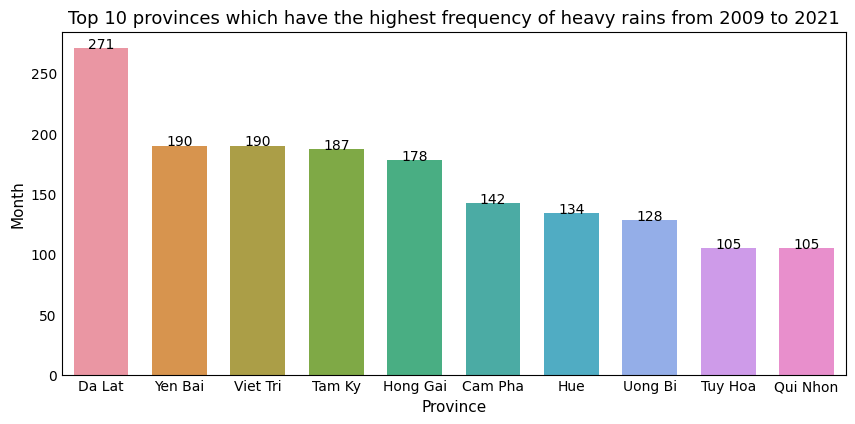

In [ ]:
### Graph illustrates top 10 provinces which have the highest frequency of rain from 2009 to 2021
fig = plt.subplots(figsize= (8,3.5))
sns.barplot(data= hvy_rain_rating, x='province', y='rain', width=0.7)
plt.style.use('_mpl-gallery-nogrid')
plt.title('Top 10 provinces which have the highest frequency of heavy rains from 2009 to 2021', fontsize= 13)

### Using def function to add value labels for graph
addlabels(x,y)

plt.xlabel('Province', fontsize= 11)
plt.ylabel('Month', fontsize= 11)
plt.show()

## Pressure analysis

In [ ]:
pressure_table = df[['province','date_time','pressure', 'max', 'min']]
max = np.array(pressure_table['max'])
min = np.array(pressure_table['min'])
pressure_table['avg_temp'] = (max+min)/2
pressure_table

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_18620/1333953164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pressure_table['avg_temp'] = (max+min)/2


,province,date_time,pressure,max,min,avg_temp
0,Bac Lieu,2009-01-01,1010,27,22,24.5
1,Bac Lieu,2010-01-01,1010,31,25,28.0
2,Bac Lieu,2011-01-01,1008,29,24,26.5
3,Bac Lieu,2012-01-01,1012,30,24,27.0
4,Bac Lieu,2013-01-01,1010,31,25,28.0
...,...,...,...,...,...,...
181955,Soc Trang,2016-12-28,1011,28,23,25.5
181956,Soc Trang,2017-12-28,1011,30,24,27.0
181957,Soc Trang,2018-12-28,1009,26,24,25.0
181958,Soc Trang,2019-12-28,1012,30,23,26.5


In [ ]:
### Find provinces which have high pressure 
high_pressure_table = pressure_table.query('pressure>1022.689').sort_values('date_time')
high_pressure_table['month'] = high_pressure_table['date_time'].dt.month

### Find the frequency of high atmospheric pressure from 2009 to 2021
high_press_freq = high_pressure_table.groupby('month', as_index=False)['pressure'].count().sort_values('month')
mylist = [[5,0],[6,0],[7,0],[8,0],[9,0]]
high_press_freq = high_press_freq.append(pd.DataFrame(mylist, columns=['month','pressure']))
high_press_freq = high_press_freq.sort_values('month')

/var/folders/mf/14nm5d1d2mdch5rkhnqkvxh00000gn/T/ipykernel_18620/2973817752.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_press_freq = high_press_freq.append(pd.DataFrame(mylist, columns=['month','pressure']))


Text(0.5, 1.0, 'Frequency of high pressure weather by month from 2009 to 2021')

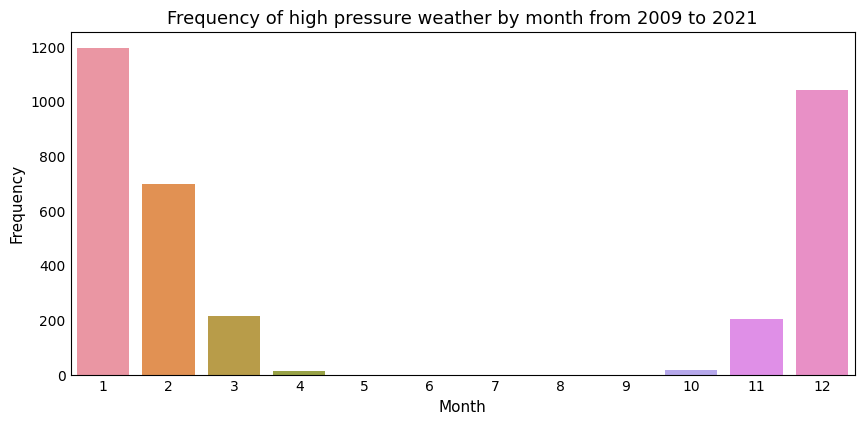

In [ ]:
### Graph illustrates relationship between average temperature and atmospheric pressure of 40 provinces from 2009 - 2021
fig = plt.subplots(figsize= (8,3.5))
sns.barplot(data=high_press_freq, x='month', y='pressure')
plt.style.use('_mpl-gallery-nogrid')
plt.xlabel('Month', fontsize=11)
plt.ylabel('Frequency', fontsize= 11)
plt.title('Frequency of high pressure weather by month from 2009 to 2021', fontsize= 13)